#                               Wine Classification using custom PCA
##                COMPSCIX433.3-007 Python for Data Analysis and Scientific Computing
####                                                       Submitted by:  Sushil Garg, Aparna Vaidya, Sravani Gunti

In [643]:
%reset -f

# Import all necessary libraries

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import scipy as sp
import pandas as pd

Pandas is a famous library to import CSV data as dataframes. Numpy also offers inbuilt methods to load csv data. Let's compare both here to see how they work.

**Using Numpy**

In [644]:
# Load data using numpy library

load_data_numpy = np.loadtxt(open("wine.csv", "r"), delimiter=",", skiprows=1, dtype=np.float64)
load_data_numpy

array([[14.23, 1.71, 2.43, ..., 3.92, 1065.00, 1.00],
       [13.20, 1.78, 2.14, ..., 3.40, 1050.00, 1.00],
       [13.16, 2.36, 2.67, ..., 3.17, 1185.00, 1.00],
       ...,
       [13.27, 4.28, 2.26, ..., 1.56, 835.00, 3.00],
       [13.17, 2.59, 2.37, ..., 1.62, 840.00, 3.00],
       [14.13, 4.10, 2.74, ..., 1.60, 560.00, 3.00]])

**Using Pandas**

In [645]:
# Load data using pandas library

load_data_pandas = pd.read_csv("wine.csv")
load_data_pandas

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,1


Pandas offer much better way of importing csv data in form of dataframes rather than as ndarray using numpy. We will continue to use pandas.

In [646]:
data = pd.read_csv("wine.csv")

**Exploring the Dataset**

In [647]:
# Shape of the data
print('\nTotal number of samples (rows):', data.shape[0])
print('Total number of features (columns):', data.shape[1])

# Print Data
data.head(5)


Total number of samples (rows): 178
Total number of features (columns): 14


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [648]:
# descriptions
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


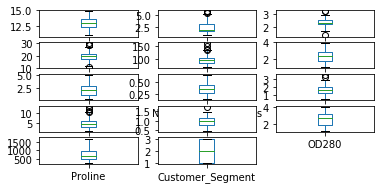

In [649]:
# box and whisker plots
boxplot = data.plot(kind='box', subplots=True, layout=(7,3), sharex=False, sharey=False)

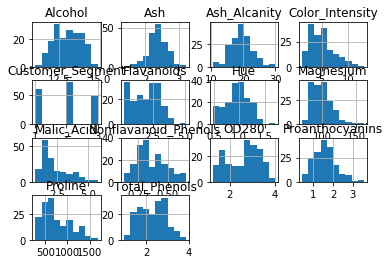

In [650]:
# histograms
histogram = data.hist()

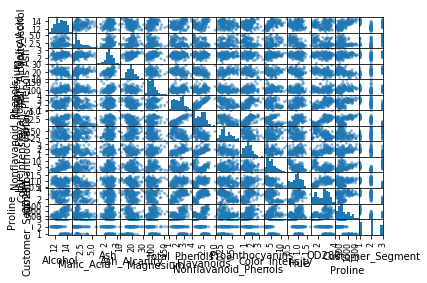

In [651]:
# scatter plot matrix
scatter_plot = scatter_matrix(data)

In [652]:
# Class distribution
dist_size = data.groupby('Customer_Segment').size()
print(dist_size, "\n")

# printing the rel.frequency of the class labels
y_wine = data['Customer_Segment']

print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1) / y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2) / y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3) / y_wine.shape[0]))

Customer_Segment
1    59
2    71
3    48
dtype: int64 

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


**Split the Dataset**

We need to split the dataset in to separate training set and test set. This is needed to test model performance on real data unseen before. Scikit-learn library provides an easy-to-use method to split the dataset.

In [653]:
raw_data = data.values

# load the 13 features
X_wine = raw_data[:, 0:13]

# load class labels from column 1
y_wine = raw_data[:, 13]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

print("Feature vectors of the dataset: ", "\n", X_wine)
print("\n")
print("Labels of the dataset: ", "\n", y_wine)

Feature vectors of the dataset:  
 [[14.23 1.71 2.43 ... 1.04 3.92 1065.00]
 [13.20 1.78 2.14 ... 1.05 3.40 1050.00]
 [13.16 2.36 2.67 ... 1.03 3.17 1185.00]
 ...
 [13.27 4.28 2.26 ... 0.59 1.56 835.00]
 [13.17 2.59 2.37 ... 0.60 1.62 840.00]
 [14.13 4.10 2.74 ... 0.61 1.60 560.00]]


Labels of the dataset:  
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [654]:
test_percent = 0.20
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=test_percent, random_state=random_seed)

print("No. of samples in Traning Dataset: ", X_train.shape[0])
print("No. of samples in Test Dataset: ", X_test.shape[0])

No. of samples in Traning Dataset:  142
No. of samples in Test Dataset:  36


**Checking if the training and test datasets are balanced even after split.** 

In [655]:
print('Class label frequencies')

print('\nTraining Dataset:')
for l in range(1, 4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l) / y_train.shape[0]))

print('\nTest Dataset:')
for l in range(1, 4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l) / y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 31.69%
Class 2 samples: 40.14%
Class 3 samples: 28.17%

Test Dataset:
Class 1 samples: 38.89%
Class 2 samples: 38.89%
Class 3 samples: 22.22%


**Normalizing the Dataset**

It is important to normalize the dataset since different columns have different measurement units.

Here we use StandardScaler() method from scikit-learn library which scales the features so that they are centered around 0 with a standard deviation of 1. 

In [656]:
# Setting the Print Options
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind': float_formatter})

# Printing the 1st wine sample before normalization
print('\n1st sample (i.e., 1st row) before normalization:\n{:}\n'.format(X_train[0]))

std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)

# Printing the 1st wine sample after normalization
print('\n1st sample (i.e., 1st row) after normalization:\n{:}\n'.format(X_train_std[0]))



1st sample (i.e., 1st row) before normalization:
[14.34 1.68 2.70 25.00 98.00 2.80 1.31 0.53 2.70 13.00 0.57 1.96 660.00]


1st sample (i.e., 1st row) after normalization:
[1.67 -0.61 1.22 1.61 -0.17 0.80 -0.69 1.27 1.88 3.42 -1.66 -0.88 -0.25]



## Principal Component Analysis

Now, we will apply PCA on our data. scikit-learn library provides an inbuilt PCA class which can be used easily. But, here we will not use that class. Instead, we will implement PCA using only what numpy and scipy libraries provides.

First, we calculate the covariance matrix.

In [657]:
mean_vec = np.mean(X_train_std, axis=0)
new_cov_mat = (X_train_std - mean_vec).T.dot((X_train_std - mean_vec)) / (X_train_std.shape[0]-1)

print('Covariance matrix: \n', new_cov_mat)

Covariance matrix: 
 [[1.01 0.06 0.21 -0.32 0.22 0.28 0.22 -0.09 0.14 0.52 -0.07 0.06 0.62]
 [0.06 1.01 0.19 0.31 -0.12 -0.32 -0.41 0.35 -0.20 0.26 -0.53 -0.37 -0.23]
 [0.21 0.19 1.01 0.47 0.24 0.12 0.11 0.25 -0.01 0.26 -0.10 0.02 0.20]
 [-0.32 0.31 0.47 1.01 -0.11 -0.30 -0.34 0.40 -0.21 0.03 -0.27 -0.26
  -0.47]
 [0.22 -0.12 0.24 -0.11 1.01 0.21 0.19 -0.25 0.24 0.15 0.08 0.10 0.39]
 [0.28 -0.32 0.12 -0.30 0.21 1.01 0.86 -0.42 0.61 -0.07 0.40 0.70 0.47]
 [0.22 -0.41 0.11 -0.34 0.19 0.86 1.01 -0.51 0.65 -0.21 0.53 0.81 0.47]
 [-0.09 0.35 0.25 0.40 -0.25 -0.42 -0.51 1.01 -0.34 0.22 -0.30 -0.49
  -0.28]
 [0.14 -0.20 -0.01 -0.21 0.24 0.61 0.65 -0.34 1.01 -0.01 0.27 0.53 0.32]
 [0.52 0.26 0.26 0.03 0.15 -0.07 -0.21 0.22 -0.01 1.01 -0.58 -0.46 0.29]
 [-0.07 -0.53 -0.10 -0.27 0.08 0.40 0.53 -0.30 0.27 -0.58 1.01 0.58 0.21]
 [0.06 -0.37 0.02 -0.26 0.10 0.70 0.81 -0.49 0.53 -0.46 0.58 1.01 0.32]
 [0.62 -0.23 0.20 -0.47 0.39 0.47 0.47 -0.28 0.32 0.29 0.21 0.32 1.01]]


Numpy provides a function to calculate covariance matrix directly.

In [658]:
# Covariance Matrix using numpy
np_cov_mat = np.cov(X_train_std.T)
print('NumPy covariance matrix: \n', np_cov_mat)

NumPy covariance matrix: 
 [[1.01 0.06 0.21 -0.32 0.22 0.28 0.22 -0.09 0.14 0.52 -0.07 0.06 0.62]
 [0.06 1.01 0.19 0.31 -0.12 -0.32 -0.41 0.35 -0.20 0.26 -0.53 -0.37 -0.23]
 [0.21 0.19 1.01 0.47 0.24 0.12 0.11 0.25 -0.01 0.26 -0.10 0.02 0.20]
 [-0.32 0.31 0.47 1.01 -0.11 -0.30 -0.34 0.40 -0.21 0.03 -0.27 -0.26
  -0.47]
 [0.22 -0.12 0.24 -0.11 1.01 0.21 0.19 -0.25 0.24 0.15 0.08 0.10 0.39]
 [0.28 -0.32 0.12 -0.30 0.21 1.01 0.86 -0.42 0.61 -0.07 0.40 0.70 0.47]
 [0.22 -0.41 0.11 -0.34 0.19 0.86 1.01 -0.51 0.65 -0.21 0.53 0.81 0.47]
 [-0.09 0.35 0.25 0.40 -0.25 -0.42 -0.51 1.01 -0.34 0.22 -0.30 -0.49
  -0.28]
 [0.14 -0.20 -0.01 -0.21 0.24 0.61 0.65 -0.34 1.01 -0.01 0.27 0.53 0.32]
 [0.52 0.26 0.26 0.03 0.15 -0.07 -0.21 0.22 -0.01 1.01 -0.58 -0.46 0.29]
 [-0.07 -0.53 -0.10 -0.27 0.08 0.40 0.53 -0.30 0.27 -0.58 1.01 0.58 0.21]
 [0.06 -0.37 0.02 -0.26 0.10 0.70 0.81 -0.49 0.53 -0.46 0.58 1.01 0.32]
 [0.62 -0.23 0.20 -0.47 0.39 0.47 0.47 -0.28 0.32 0.29 0.21 0.32 1.01]]


We see that both ways gives out the same covariance matrix. We can select either one.

In [659]:
# Change assignment to "new_cov_mat" to use the other covariance matrix.
cov_mat = np_cov_mat

# Print Dimensions of covariance matrix
cov_shape = cov_mat.shape
print ("Dimension of covariance matrix is : ", cov_shape)

Dimension of covariance matrix is :  (13, 13)


Now, we calculate the Eigenvectors and Eigenvalues of the covariance matrix.

We can use the numpy's "linalg" to calculate both.

In [660]:
eig_vals_numpy, eig_vecs_numpy = np.linalg.eig(cov_mat)

print('Eigenvalues using numpy: \n', eig_vals_numpy)
print('\nEigenvectors using numpy: \n', eig_vecs_numpy)

Eigenvalues using numpy: 
 [4.70 2.45 1.52 0.97 0.87 0.64 0.55 0.11 0.35 0.31 0.17 0.25 0.22]

Eigenvectors using numpy: 
 [[-0.13 0.49 -0.19 -0.08 -0.31 -0.19 0.04 0.04 0.49 0.42 -0.22 0.29 -0.13]
 [0.26 0.19 0.14 -0.42 0.21 -0.66 -0.36 0.03 0.02 -0.02 0.11 -0.25 0.13]
 [0.02 0.32 0.61 0.21 -0.20 -0.12 0.18 -0.18 -0.11 -0.23 -0.09 -0.17
  -0.52]
 [0.24 -0.04 0.60 0.05 0.09 0.13 0.25 0.14 0.39 0.06 -0.04 0.16 0.54]
 [-0.15 0.26 0.07 0.65 0.51 -0.08 -0.31 0.06 -0.12 0.28 0.06 0.11 0.04]
 [-0.38 0.10 0.18 -0.25 -0.01 0.09 0.08 -0.41 -0.38 0.41 -0.31 -0.23 0.33]
 [-0.42 0.02 0.18 -0.18 -0.03 0.01 0.09 0.83 -0.17 0.09 0.04 -0.12 -0.08]
 [0.30 0.08 0.20 -0.05 -0.46 0.32 -0.62 0.10 -0.28 0.14 0.03 0.23 0.05]
 [-0.31 0.07 0.15 -0.33 0.38 0.42 -0.39 -0.11 0.37 -0.28 -0.16 0.04 -0.20]
 [0.12 0.53 -0.12 -0.12 0.06 0.39 0.18 -0.04 0.01 0.07 0.62 -0.29 0.07]
 [-0.30 -0.28 0.07 0.28 -0.37 -0.06 -0.29 -0.08 0.42 0.10 0.25 -0.51 0.10]
 [-0.38 -0.14 0.21 -0.15 -0.05 -0.21 0.03 -0.24 -0.07 -0.00 0.59 0

Scipy also offers it's own implementation of various linear algebra operations. Here, we will caculate eigenvalues and eigenvectors of the covariance matrix using scipy.

In [661]:
eig_vals_scipy, eig_vecs_scipy = sp.linalg.eig(cov_mat)

print('Eigenvalues using scipy: \n', eig_vals_scipy)
print('\nEigenvectors using scipy: \n', eig_vecs_scipy)

Eigenvalues using scipy: 
 [4.7001079 +0.j 2.44718518+0.j 1.51955347+0.j 0.96511967+0.j
 0.8711365 +0.j 0.63557147+0.j 0.54922318+0.j 0.10817517+0.j
 0.35138442+0.j 0.30733415+0.j 0.16534507+0.j 0.24740768+0.j
 0.22465471+0.j]

Eigenvectors using scipy: 
 [[-0.13 0.49 -0.19 -0.08 -0.31 -0.19 0.04 0.04 0.49 0.42 -0.22 0.29 -0.13]
 [0.26 0.19 0.14 -0.42 0.21 -0.66 -0.36 0.03 0.02 -0.02 0.11 -0.25 0.13]
 [0.02 0.32 0.61 0.21 -0.20 -0.12 0.18 -0.18 -0.11 -0.23 -0.09 -0.17
  -0.52]
 [0.24 -0.04 0.60 0.05 0.09 0.13 0.25 0.14 0.39 0.06 -0.04 0.16 0.54]
 [-0.15 0.26 0.07 0.65 0.51 -0.08 -0.31 0.06 -0.12 0.28 0.06 0.11 0.04]
 [-0.38 0.10 0.18 -0.25 -0.01 0.09 0.08 -0.41 -0.38 0.41 -0.31 -0.23 0.33]
 [-0.42 0.02 0.18 -0.18 -0.03 0.01 0.09 0.83 -0.17 0.09 0.04 -0.12 -0.08]
 [0.30 0.08 0.20 -0.05 -0.46 0.32 -0.62 0.10 -0.28 0.14 0.03 0.23 0.05]
 [-0.31 0.07 0.15 -0.33 0.38 0.42 -0.39 -0.11 0.37 -0.28 -0.16 0.04 -0.20]
 [0.12 0.53 -0.12 -0.12 0.06 0.39 0.18 -0.04 0.01 0.07 0.62 -0.29 0.07]
 [-0.30 

In some areas, correlation matrix is used instead of the covariance matrix. Since the correlation matrix is same as the normalized covariance matrix, the eigendecomposition of the covariance matrix gives the same results as a eigendecomposition on the correlation matrix. We will quickly verify this.

Using Correlation Matrix of the normalized data.

In [662]:
cor_mat1 = np.corrcoef(X_train_std.T)
eig_vals_cor1, eig_vecs_cor1 = np.linalg.eig(cor_mat1)

print('Eigenvalues: \n', eig_vals_cor1)
print('\nEigenvectors: \n', eig_vecs_cor1)

Eigenvalues: 
 [4.67 2.43 1.51 0.96 0.87 0.63 0.55 0.11 0.35 0.31 0.16 0.25 0.22]

Eigenvectors: 
 [[-0.13 0.49 0.19 0.08 -0.31 -0.19 0.04 0.04 0.49 0.42 -0.22 0.29 -0.13]
 [0.26 0.19 -0.14 0.42 0.21 -0.66 -0.36 0.03 0.02 -0.02 0.11 -0.25 0.13]
 [0.02 0.32 -0.61 -0.21 -0.20 -0.12 0.18 -0.18 -0.11 -0.23 -0.09 -0.17
  -0.52]
 [0.24 -0.04 -0.60 -0.05 0.09 0.13 0.25 0.14 0.39 0.06 -0.04 0.16 0.54]
 [-0.15 0.26 -0.07 -0.65 0.51 -0.08 -0.31 0.06 -0.12 0.28 0.06 0.11 0.04]
 [-0.38 0.10 -0.18 0.25 -0.01 0.09 0.08 -0.41 -0.38 0.41 -0.31 -0.23 0.33]
 [-0.42 0.02 -0.18 0.18 -0.03 0.01 0.09 0.83 -0.17 0.09 0.04 -0.12 -0.08]
 [0.30 0.08 -0.20 0.05 -0.46 0.32 -0.62 0.10 -0.28 0.14 0.03 0.23 0.05]
 [-0.31 0.07 -0.15 0.33 0.38 0.42 -0.39 -0.11 0.37 -0.28 -0.16 0.04 -0.20]
 [0.12 0.53 0.12 0.12 0.06 0.39 0.18 -0.04 0.01 0.07 0.62 -0.29 0.07]
 [-0.30 -0.28 -0.07 -0.28 -0.37 -0.06 -0.29 -0.08 0.42 0.10 0.25 -0.51
  0.10]
 [-0.38 -0.14 -0.21 0.15 -0.05 -0.21 0.03 -0.24 -0.07 -0.00 0.59 0.55
  -0.02]
 [-0.

Using Correlation Matrix of the original data.

In [663]:
cor_mat2 = np.corrcoef(X_train.T)
eig_vals_cor2, eig_vecs_cor2 = np.linalg.eig(cor_mat2)

print('Eigenvalues \n', eig_vals_cor2)
print('\nEigenvectors \n', eig_vecs_cor2)

Eigenvalues 
 [4.67 2.43 1.51 0.96 0.87 0.63 0.55 0.11 0.35 0.31 0.16 0.25 0.22]

Eigenvectors 
 [[-0.13 0.49 -0.19 -0.08 -0.31 -0.19 0.04 0.04 0.49 0.42 -0.22 0.29 -0.13]
 [0.26 0.19 0.14 -0.42 0.21 -0.66 -0.36 0.03 0.02 -0.02 0.11 -0.25 0.13]
 [0.02 0.32 0.61 0.21 -0.20 -0.12 0.18 -0.18 -0.11 -0.23 -0.09 -0.17
  -0.52]
 [0.24 -0.04 0.60 0.05 0.09 0.13 0.25 0.14 0.39 0.06 -0.04 0.16 0.54]
 [-0.15 0.26 0.07 0.65 0.51 -0.08 -0.31 0.06 -0.12 0.28 0.06 0.11 0.04]
 [-0.38 0.10 0.18 -0.25 -0.01 0.09 0.08 -0.41 -0.38 0.41 -0.31 -0.23 0.33]
 [-0.42 0.02 0.18 -0.18 -0.03 0.01 0.09 0.83 -0.17 0.09 0.04 -0.12 -0.08]
 [0.30 0.08 0.20 -0.05 -0.46 0.32 -0.62 0.10 -0.28 0.14 0.03 0.23 0.05]
 [-0.31 0.07 0.15 -0.33 0.38 0.42 -0.39 -0.11 0.37 -0.28 -0.16 0.04 -0.20]
 [0.12 0.53 -0.12 -0.12 0.06 0.39 0.18 -0.04 0.01 0.07 0.62 -0.29 0.07]
 [-0.30 -0.28 0.07 0.28 -0.37 -0.06 -0.29 -0.08 0.42 0.10 0.25 -0.51 0.10]
 [-0.38 -0.14 0.21 -0.15 -0.05 -0.21 0.03 -0.24 -0.07 -0.00 0.59 0.55
  -0.02]
 [-0.28 0.38 

Eigenvalues and Eigenvectors of correlation matrix are very close to that of covariance matrix but it is not exactly matching. 

For covariance matrix, both scipy and numpy gives almost identical result but scipy returns complex values intead of real values of the eigenvalues. We can use either one (May want to change data type of eigenvalues if select scipy output).

In [664]:
eig_vals = eig_vals_numpy
eig_vecs = eig_vecs_numpy

**Singular Value Decomposition (SVD)**

SVD is another popular (and efficient) implementation used instead of eigendecomposition of covraiance/correlation matrix. Here, we will perform SVD to verify that the results are same as before.

In [665]:
u, s, v = np.linalg.svd(X_train_std.T)

print(u)

[[-0.13 -0.49 0.19 -0.08 -0.31 0.19 -0.04 0.49 -0.42 0.29 -0.13 -0.22
  -0.04]
 [0.26 -0.19 -0.14 -0.42 0.21 0.66 0.36 0.02 0.02 -0.25 0.13 0.11 -0.03]
 [0.02 -0.32 -0.61 0.21 -0.20 0.12 -0.18 -0.11 0.23 -0.17 -0.52 -0.09
  0.18]
 [0.24 0.04 -0.60 0.05 0.09 -0.13 -0.25 0.39 -0.06 0.16 0.54 -0.04 -0.14]
 [-0.15 -0.26 -0.07 0.65 0.51 0.08 0.31 -0.12 -0.28 0.11 0.04 0.06 -0.06]
 [-0.38 -0.10 -0.18 -0.25 -0.01 -0.09 -0.08 -0.38 -0.41 -0.23 0.33 -0.31
  0.41]
 [-0.42 -0.02 -0.18 -0.18 -0.03 -0.01 -0.09 -0.17 -0.09 -0.12 -0.08 0.04
  -0.83]
 [0.30 -0.08 -0.20 -0.05 -0.46 -0.32 0.62 -0.28 -0.14 0.23 0.05 0.03
  -0.10]
 [-0.31 -0.07 -0.15 -0.33 0.38 -0.42 0.39 0.37 0.28 0.04 -0.20 -0.16 0.11]
 [0.12 -0.53 0.12 -0.12 0.06 -0.39 -0.18 0.01 -0.07 -0.29 0.07 0.62 0.04]
 [-0.30 0.28 -0.07 0.28 -0.37 0.06 0.29 0.42 -0.10 -0.51 0.10 0.25 0.08]
 [-0.38 0.14 -0.21 -0.15 -0.05 0.21 -0.03 -0.07 0.00 0.55 -0.02 0.59 0.24]
 [-0.28 -0.38 0.14 0.16 -0.23 0.10 0.07 -0.09 0.64 0.08 0.48 -0.11 -0.03]]


**Sorting the Eigenvectors and Eigenvalues**

Eigenvectors gives only the direction in the new projection space. Magnitude of the eigenvectors should be one. 

We will use numpy's linalg to quickly verify this.

In [666]:
eig_vec_magnitude = 1.0 # Change this value to anything other than 1.0 to raise Assetion Error.

try:
    for ev in eig_vecs.T:
        np.testing.assert_array_almost_equal(eig_vec_magnitude, np.linalg.norm(ev))
    print('Everything looks ok here.')
except AssertionError:
    print('Something is wrong here.')

Everything looks ok here.


The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data and those are the ones that can be dropped without losing too much information.

Here, we will sort the eigenvalues from highest to lowest.

In [667]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:\n')

for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:

4.700107896506958
2.4471851823164847
1.5195534714145178
0.9651196740849948
0.8711365035385638
0.6355714716549296
0.5492231787401313
0.35138442173236434
0.3073341500744866
0.24740768197216856
0.22465470817027103
0.16534507031979212
0.10817517103461921


To determine how many principal components to use, we will use "explained variance”. The explained variance tells us how much information can be attributed to each of the principal components.

In [668]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

print("Explained variance: \n", var_exp)

Explained variance: 
 [35.900065731716204, 18.691934491149752, 11.606556850999297, 7.371715820475854, 6.653859534070287, 4.854581663236461, 4.1950416144289555, 2.6839221811626963, 2.3474601928766314, 1.88973364886651, 1.7159433289278558, 1.2629282185856279, 0.8262567235038629]


Also calculating the cumulative explained variance. This will help us in determining how many components to use. Numpy has a handy function to calculate cumulative sum of an array.

In [669]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Explained Variance: \n", cum_var_exp)

Cumulative Explained Variance: 
 [35.90 54.59 66.20 73.57 80.22 85.08 89.27 91.96 94.31 96.19 97.91 99.17
 100.00]


Plotting the explained variance and cumulative explained variance.

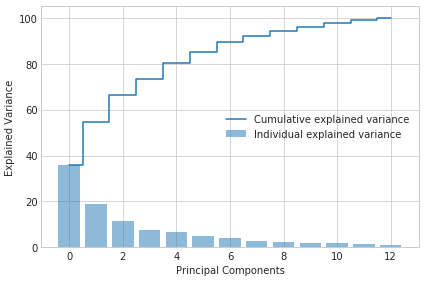

In [670]:
n = len(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(n), cum_var_exp, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained Variance')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

**Selecting the Number of Components**

We can manually select the number of component to select by looking at the graph above. 

Here, we will write a simple program to calculate the number of component based on minimum total variance they can explain.

In [671]:
# Minimum variance/information we want to retain in our projection. Max value = 100.0
min_explained_variance = 88.0 

k = 0

for idx,var in enumerate(cum_var_exp):
    if var > min_explained_variance:
        k = idx+1
        break
        
print("Number of components to select in new projection: ", k)
print("Together, above components cover this much information: ", cum_var_exp[k-1])

Number of components to select in new projection:  7
Together, above components cover this much information:  89.27375570607683


**Calculation of the projection matrix**

Eigenvectors of above selected k components will be concatenated together to form the projection matrix. 

In general, we reduce the n-dimensional feature space to a k-dimensional feature subspace, by choosing the “top k” eigenvectors with the highest eigenvalues to construct our **d×k**-dimensional eigenvector matrix **W**

In [672]:
a = X_train_std.shape[1]

w = np.hstack([pair[1].reshape(a,1) for pair in eig_pairs])[:,:k]

print('Matrix W:\n', w)

Matrix W:
 [[-0.13 0.49 -0.19 -0.08 -0.31 -0.19 0.04]
 [0.26 0.19 0.14 -0.42 0.21 -0.66 -0.36]
 [0.02 0.32 0.61 0.21 -0.20 -0.12 0.18]
 [0.24 -0.04 0.60 0.05 0.09 0.13 0.25]
 [-0.15 0.26 0.07 0.65 0.51 -0.08 -0.31]
 [-0.38 0.10 0.18 -0.25 -0.01 0.09 0.08]
 [-0.42 0.02 0.18 -0.18 -0.03 0.01 0.09]
 [0.30 0.08 0.20 -0.05 -0.46 0.32 -0.62]
 [-0.31 0.07 0.15 -0.33 0.38 0.42 -0.39]
 [0.12 0.53 -0.12 -0.12 0.06 0.39 0.18]
 [-0.30 -0.28 0.07 0.28 -0.37 -0.06 -0.29]
 [-0.38 -0.14 0.21 -0.15 -0.05 -0.21 0.03]
 [-0.28 0.38 -0.14 0.16 -0.23 -0.10 -0.07]]


**Projection in the new feature space**

Last step of PCA. we will use the d×k-dimensional projection matrix W calculated above to transform our samples onto the new subspace as **Y=X×W**

In [673]:
custom_pca_out = X_train_std.dot(w)

print("Shape of the new matrix: ", custom_pca_out.shape)
print("\nNew Matrix: \n", custom_pca_out)

Shape of the new matrix:  (142, 7)

New Matrix: 
 [[1.17 3.62 1.15 -1.17 0.22 3.06 0.55]
 [3.86 0.48 1.73 -0.47 -0.23 -1.02 -1.26]
 [-2.28 -1.28 -0.13 -1.11 0.22 1.00 0.98]
 [1.68 2.50 0.56 -1.13 -0.00 2.75 0.67]
 [-1.57 -0.69 -1.42 0.43 -0.67 -0.32 0.08]
 [-0.20 -2.23 -0.40 -0.84 0.69 1.06 -0.18]
 [-0.88 -2.00 -0.29 0.71 -0.30 0.04 0.23]
 [0.72 -0.20 -0.81 1.85 -1.65 0.09 -0.28]
 [2.32 0.35 -0.14 -0.77 -0.51 -1.65 -0.78]
 [-2.48 1.19 1.00 -0.69 0.19 0.33 -0.30]
 [-0.93 -2.37 -1.54 0.05 0.29 -0.30 -0.29]
 [1.11 -0.79 3.02 -0.52 0.65 -1.27 -0.40]
 [2.64 0.37 -1.31 0.59 0.38 1.83 -0.08]
 [-2.83 0.91 0.02 -0.11 -0.87 -0.17 0.36]
 [-0.47 -2.12 -2.39 -0.23 -0.17 0.61 0.52]
 [-2.71 1.53 -0.57 -0.03 0.42 0.02 0.17]
 [-1.78 0.85 -0.01 -0.22 -1.20 -0.42 0.63]
 [2.75 2.14 -0.90 -0.94 0.25 1.50 -0.97]
 [3.01 0.28 -0.94 -0.43 -1.04 -0.34 -0.71]
 [-0.51 -2.03 -0.39 -0.57 -0.30 -0.11 0.43]
 [-1.37 -0.76 -1.41 1.59 2.04 1.25 -2.00]
 [-1.39 0.71 0.40 1.09 -0.80 -0.47 0.23]
 [-0.83 -2.31 0.23 -1.07 0.5

## Comparison with sklearn's PCA

Now, we will implement PCA using sklearn and compare the output with our results.

In [674]:
sklearn_pca = PCA(n_components='mle')
sklearn_pca_out = sklearn_pca.fit_transform(X_train_std)

print("Shape of the new matrix: ", custom_pca_out.shape)
print("\nNew Matrix: \n", sklearn_pca_out)

Shape of the new matrix:  (142, 7)

New Matrix: 
 [[-1.17 -3.62 1.15 1.17 0.22 3.06 -0.55]
 [-3.86 -0.48 1.73 0.47 -0.23 -1.02 1.26]
 [2.28 1.28 -0.13 1.11 0.22 1.00 -0.98]
 [-1.68 -2.50 0.56 1.13 -0.00 2.75 -0.67]
 [1.57 0.69 -1.42 -0.43 -0.67 -0.32 -0.08]
 [0.20 2.23 -0.40 0.84 0.69 1.06 0.18]
 [0.88 2.00 -0.29 -0.71 -0.30 0.04 -0.23]
 [-0.72 0.20 -0.81 -1.85 -1.65 0.09 0.28]
 [-2.32 -0.35 -0.14 0.77 -0.51 -1.65 0.78]
 [2.48 -1.19 1.00 0.69 0.19 0.33 0.30]
 [0.93 2.37 -1.54 -0.05 0.29 -0.30 0.29]
 [-1.11 0.79 3.02 0.52 0.65 -1.27 0.40]
 [-2.64 -0.37 -1.31 -0.59 0.38 1.83 0.08]
 [2.83 -0.91 0.02 0.11 -0.87 -0.17 -0.36]
 [0.47 2.12 -2.39 0.23 -0.17 0.61 -0.52]
 [2.71 -1.53 -0.57 0.03 0.42 0.02 -0.17]
 [1.78 -0.85 -0.01 0.22 -1.20 -0.42 -0.63]
 [-2.75 -2.14 -0.90 0.94 0.25 1.50 0.97]
 [-3.01 -0.28 -0.94 0.43 -1.04 -0.34 0.71]
 [0.51 2.03 -0.39 0.57 -0.30 -0.11 -0.43]
 [1.37 0.76 -1.41 -1.59 2.04 1.25 2.00]
 [1.39 -0.71 0.40 -1.09 -0.80 -0.47 -0.23]
 [0.83 2.31 0.23 1.07 0.55 -0.62 0.10]

Please note that by specifying **n_components='mle'** above, it automatically calculates the number of components (based on algorithm proposed by Minka, T.P.)

### Plot comaparison

We will do a 2-D plot of two most significant vectors (Only the first two columns) for both the new projection matrix (Custom and Sklearn's).

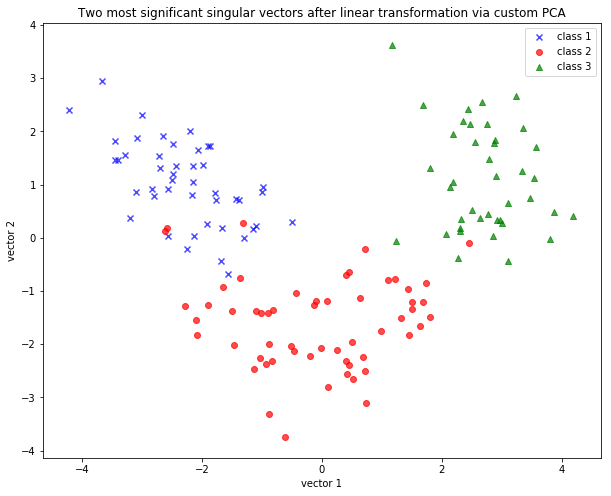

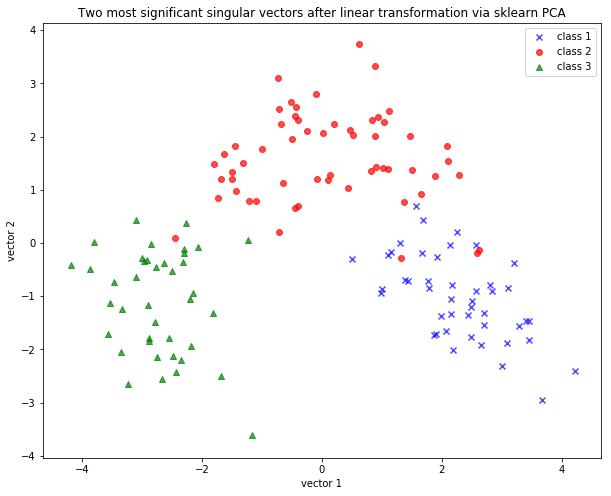

In [675]:
def plot_pca_out(a, b, title):
    plt.figure(figsize=(10, 8))
    for label, marker, color in zip(range(1, 4), ('x', 'o', '^'), ('blue', 'red', 'green')):
        plt.scatter(x=a[y_train == label],
                    y=b[y_train == label],
                    marker=marker,
                    color=color,
                    alpha=0.7,
                    label='class {}'.format(label))
    plt.xlabel('vector 1')
    plt.ylabel('vector 2')

    plt.legend()
    plt.title('Two most significant singular vectors after linear transformation via %s PCA' %title)

    plt.show()
    
v1 = custom_pca_out[:, 0]
v2 = custom_pca_out[:, 1]

plot_pca_out(v1, v2, 'custom')

v1 = sklearn_pca_out[:, 0]
v2 = sklearn_pca_out[:, 1]

plot_pca_out(v1, v2, 'sklearn')

**Apply PCA on Test Set as Well**

Now that we see that both sklearn and our custom PCA gives the same result, we will just use sklearn to apply PCA on test dataset and reduce it to using only k components.

In [676]:
sklearn_pca_test = PCA(n_components=k)
X_test_std_pca = sklearn_pca_test.fit_transform(X_test_std)

## Building the ML Model

We will implement many different algorithms and compare them.

In [677]:
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



### Without PCA

In [678]:
# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=random_seed)
    cv_results = model_selection.cross_val_score(model, X_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.986190 (0.027640)
LDA: 0.964286 (0.035714)
KNN: 0.958095 (0.034259)
CART: 0.921905 (0.087240)
NB: 0.964286 (0.065854)
SVM: 0.971905 (0.034434)


**Compare results of different algorithms**

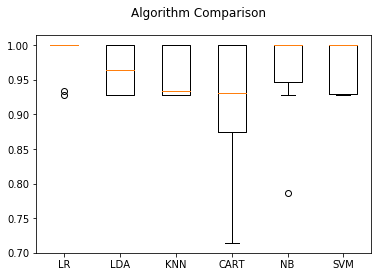

In [679]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Prediction on test set**

In [680]:
# Make predictions on Test dataset
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
predictions = knn.predict(X_test_std)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9444444444444444
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

   micro avg       0.94      0.94      0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



### With PCA

In [681]:
# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=random_seed)
    cv_results = model_selection.cross_val_score(model, custom_pca_out, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971905 (0.034434)
LDA: 0.957619 (0.047114)
KNN: 0.964762 (0.035264)
CART: 0.930000 (0.060760)
NB: 0.971429 (0.047380)
SVM: 0.971905 (0.034434)


**Compare results of different algorithms**

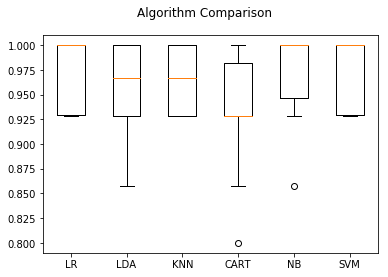

In [682]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Prediction on test set**

In [683]:
# Make predictions on Test dataset
knn = KNeighborsClassifier()
knn.fit(custom_pca_out, y_train)
predictions = knn.predict(X_test_std_pca)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9722222222222222
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

